PROJECT 2 PROPOSAL LEVEL 2

IDEA : WINE QUALITY PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

df = pd.read_csv('WineQT.csv')

In [2]:
df = df.drop('Id', axis=1)

In [3]:
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


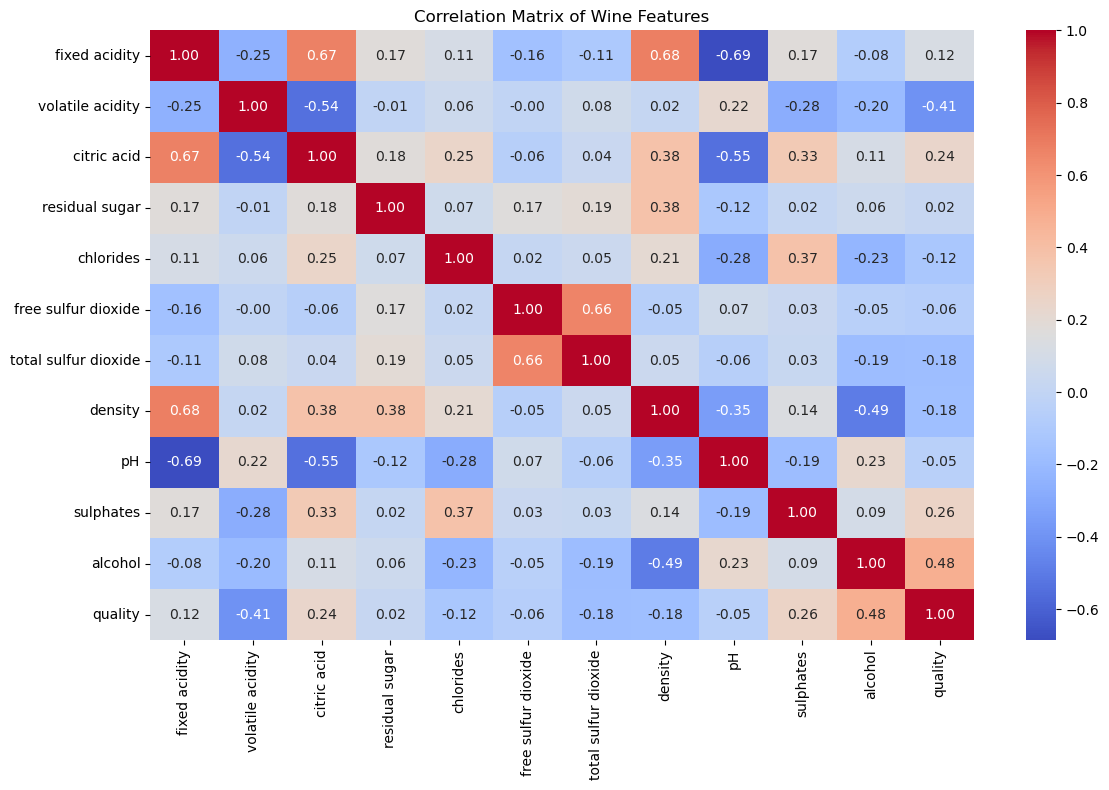

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

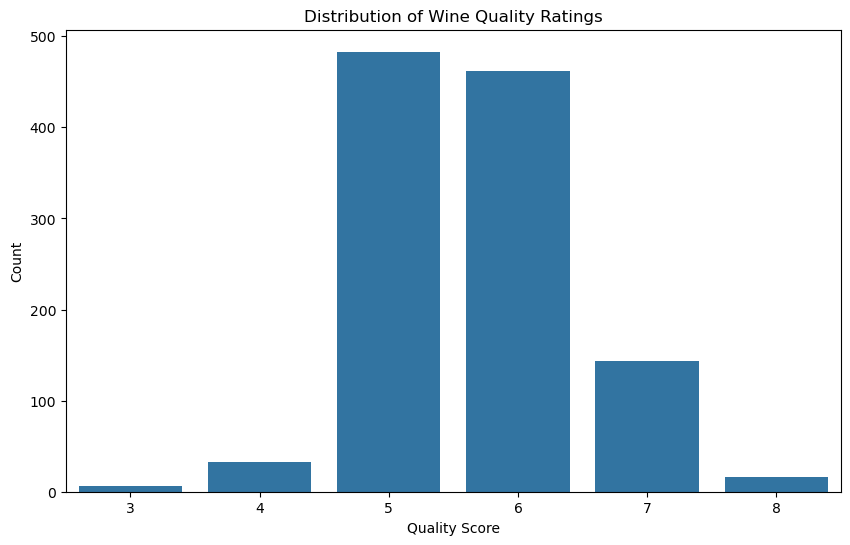

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

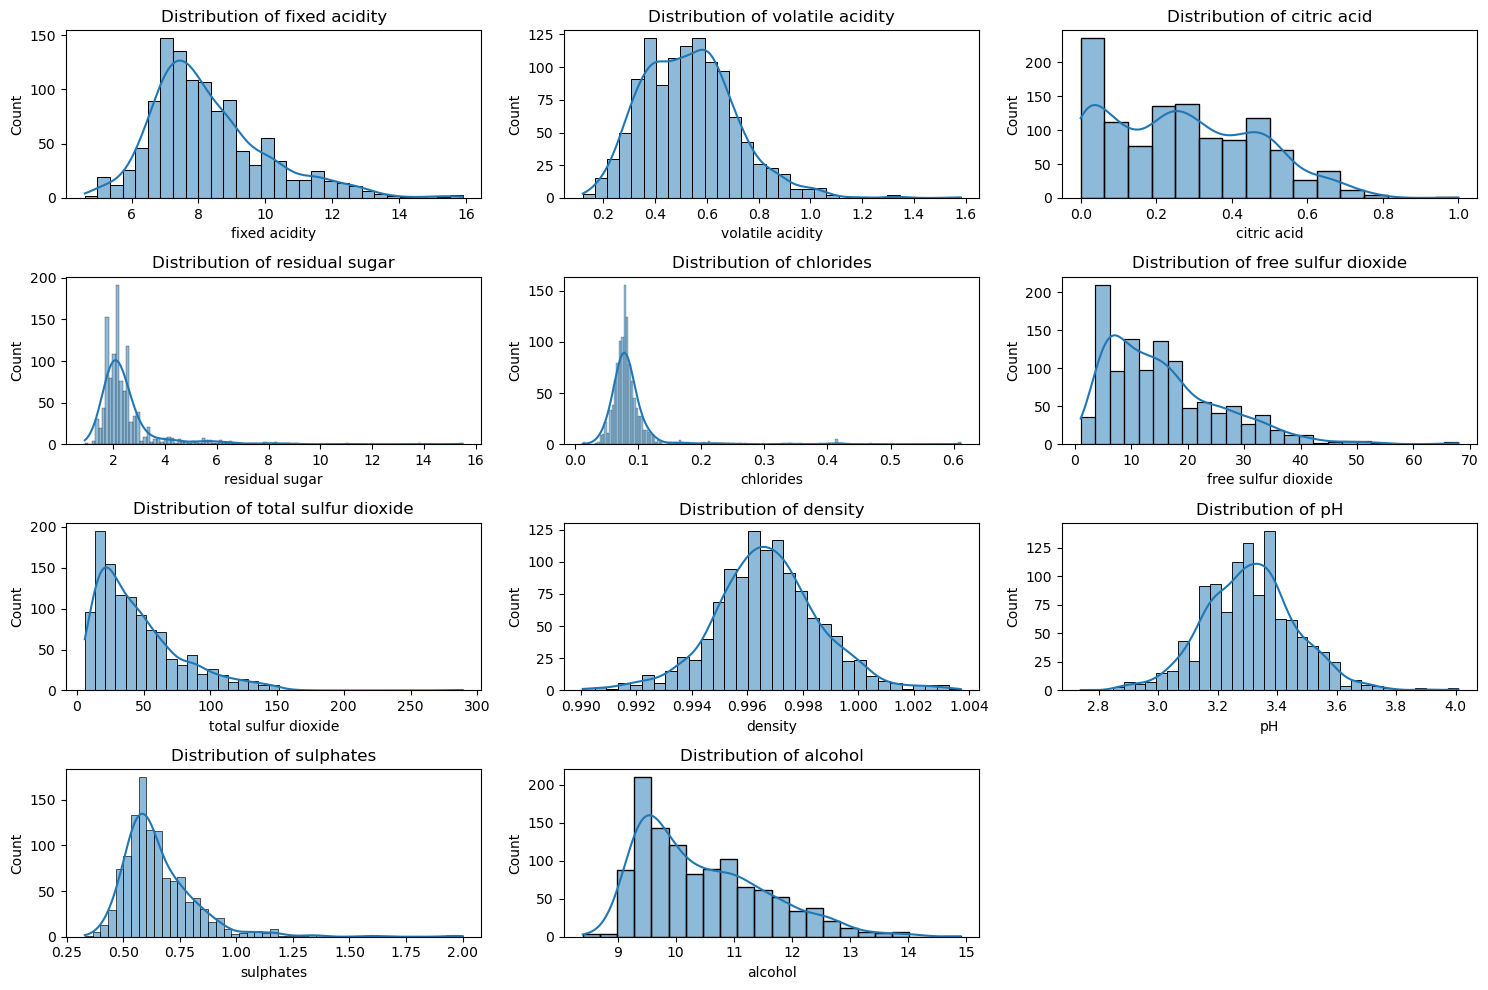

In [7]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_pipeline = Pipeline([('scaler', StandardScaler()),('rf', RandomForestClassifier(n_estimators=100, random_state=42))])
sgd_pipeline = Pipeline([('scaler', StandardScaler()),('sgd', SGDClassifier(max_iter=1000, random_state=42))])
svc_pipeline = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', random_state=42))])

In [11]:
models = {'Random Forest': rf_pipeline,'SGD Classifier': sgd_pipeline,'SVC': svc_pipeline}
results = {}

In [12]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy,'predictions': y_pred,'confusion_matrix': confusion_matrix(y_test, y_pred),
                     'classification_report': classification_report(y_test, y_pred) }
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(results[name]['classification_report'])


Training Random Forest...

Random Forest Results:
Accuracy: 0.6987

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229


Training SGD Classifier...

SGD Classifier Results:
Accuracy: 0.5022

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26


C:\Users\avinash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\avinash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\avinash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\avinash\anaconda3\Lib\sit

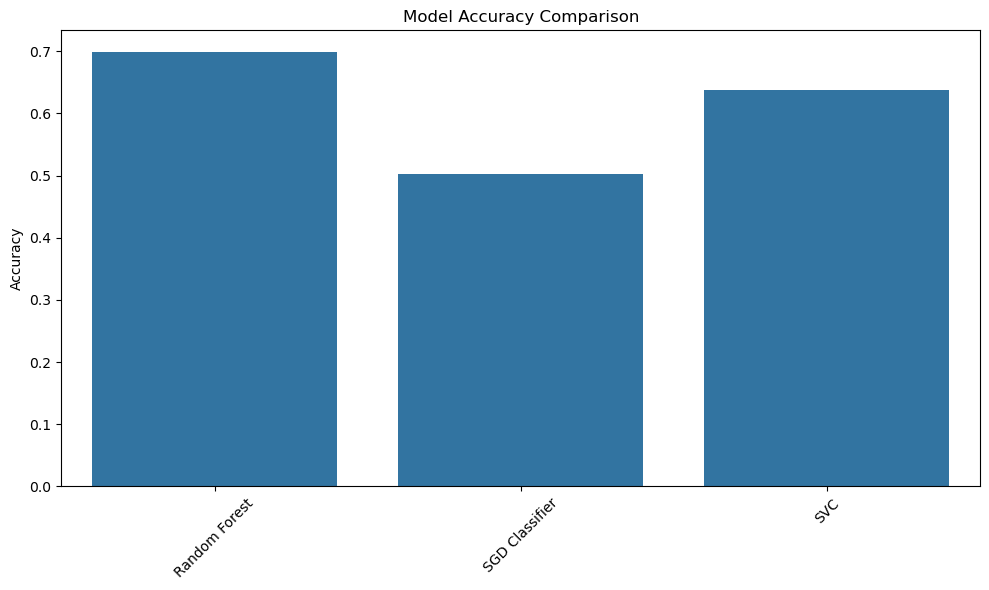

In [13]:
accuracies = [results[model]['accuracy'] for model in models.keys()]
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

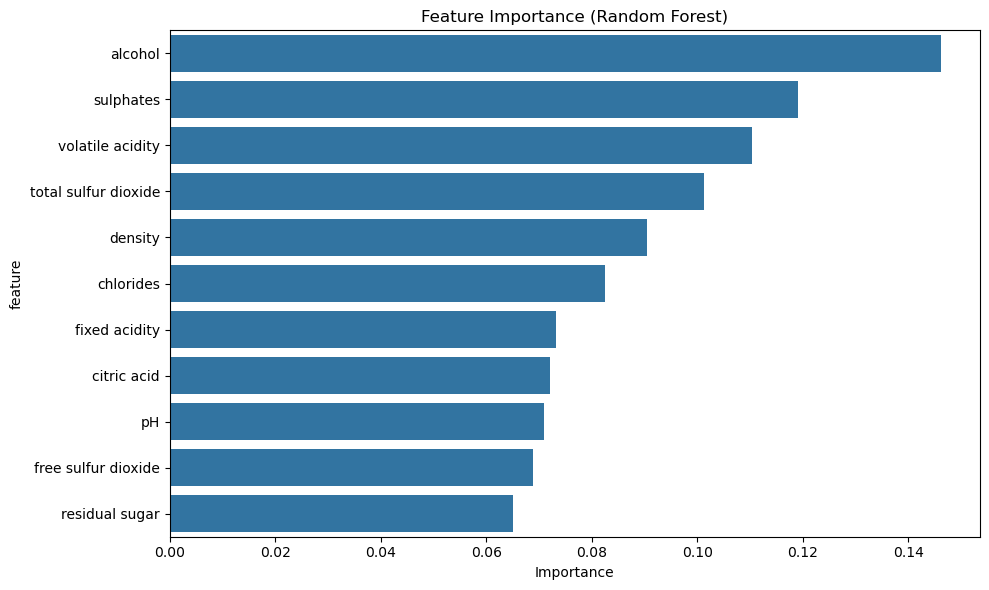

In [14]:
rf_importances = pd.DataFrame({'feature': X.columns,'importance': models['Random Forest'].named_steps['rf'].feature_importances_})
rf_importances = rf_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importances, x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

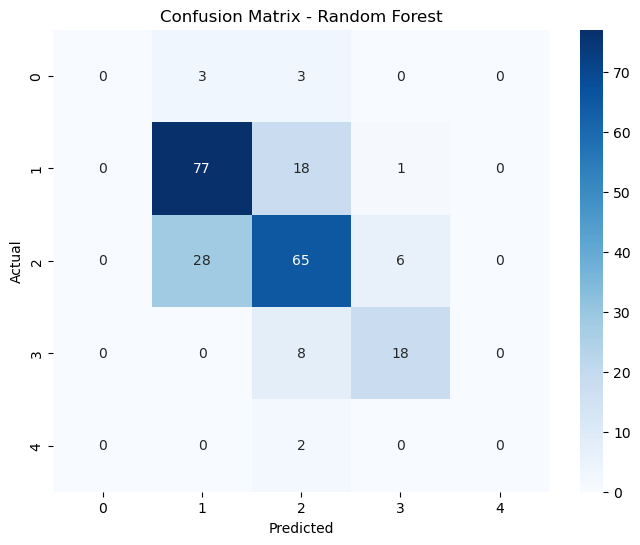

In [15]:
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
plt.figure(figsize=(8, 6))
sns.heatmap(results[best_model]['confusion_matrix'], 
            annot=True, 
            fmt='d', 
            cmap='Blues')
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
print("\nCross-validation Results:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"\n{name}:")
    print(f"Mean CV Score: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-validation Results:

Random Forest:
Mean CV Score: 0.5809
Standard Deviation: 0.0249

SGD Classifier:
Mean CV Score: 0.5320
Standard Deviation: 0.0738

SVC:
Mean CV Score: 0.6002
Standard Deviation: 0.0352


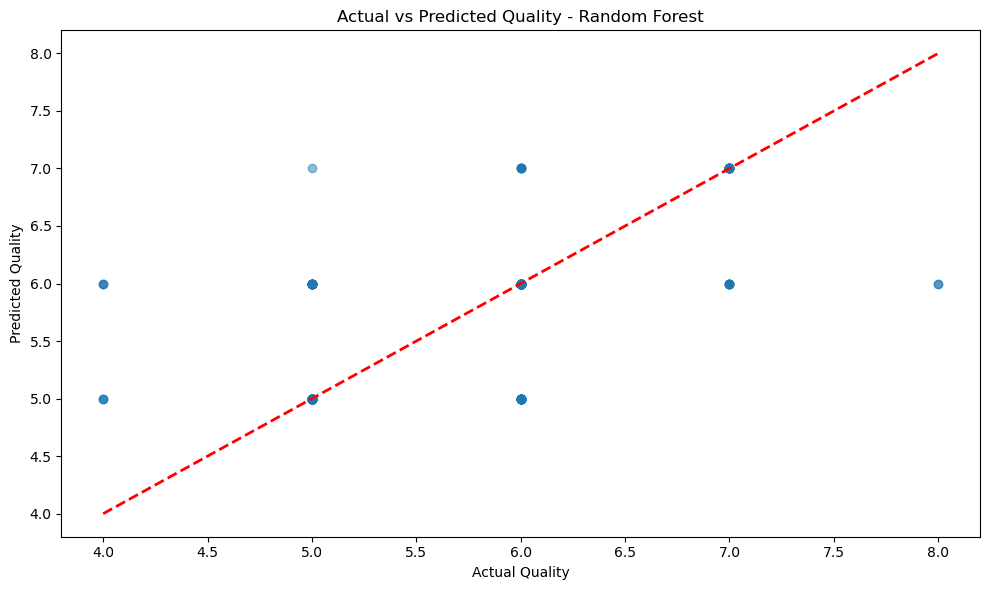

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, results[best_model]['predictions'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title(f'Actual vs Predicted Quality - {best_model}')
plt.tight_layout()
plt.show()